# 1. Importing Libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
import re


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 



# Reading Dataset

In [2]:
dataSetPath = r"..\1_DataSets\messages_Email_Spam.csv"

dataset = pd.read_csv(dataSetPath)
dataSetName = os.path.basename(dataSetPath)

print(f"Dataset Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"Dataset Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in dataset File: {totalNumberOfRowInActualDataset}")


Dataset Columns: ['subject', 'message', 'label']
****************************
Dataset Shape: (2893, 3)
****************************
Total Rows in dataset File: 2893


# Pre-proccessing Steps

In [3]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

Dataset Shape after removing duplcates: (2876, 3)
****************************
Remaining Rows in Dataset: 2876
****************************
Total Duplicates: 17


In [4]:
# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")

Remaining Rows in Dataset: 2814
****************************
Removed Number of rows containing Null Values: 62


In [5]:
cleanedDataset.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0


### Data Text preprocessing

In [8]:
# Step 2: Preprocess the Dataset using NLP techniques
def preprocess_text(text):
    # Remove special characters, numbers, and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    return ' '.join(text)

cleanedDataset['message'] = cleanedDataset['message'].apply(preprocess_text)

# Step 3: Convert text to feature vectors using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleanedDataset['message'])
y = cleanedDataset['label']

C:\Users\mubi\AppData\Local\Temp\ipykernel_20100\519678608.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedDataset['message'] = cleanedDataset['message'].apply(preprocess_text)


In [13]:
print(f"{X[5]}")

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 112 stored elements and shape (1, 53586)>
  Coords	Values
  (0, 40254)	3
  (0, 23274)	1
  (0, 49839)	6
  (0, 27928)	6
  (0, 26873)	2
  (0, 14713)	1
  (0, 25996)	1
  (0, 40229)	2
  (0, 36295)	3
  (0, 46563)	3
  (0, 11422)	1
  (0, 22643)	1
  (0, 9660)	1
  (0, 33627)	1
  (0, 16406)	1
  (0, 50564)	1
  (0, 28091)	1
  (0, 26876)	1
  (0, 45667)	6
  (0, 36255)	1
  (0, 10240)	8
  (0, 35167)	2
  (0, 9554)	1
  (0, 19344)	2
  (0, 28975)	1
  :	:
  (0, 47031)	2
  (0, 1957)	2
  (0, 21326)	2
  (0, 46899)	1
  (0, 46900)	1
  (0, 34790)	1
  (0, 28432)	1
  (0, 10754)	1
  (0, 40693)	1
  (0, 9810)	1
  (0, 36834)	1
  (0, 8002)	1
  (0, 36658)	1
  (0, 7328)	1
  (0, 16219)	1
  (0, 28684)	1
  (0, 20095)	1
  (0, 43636)	1
  (0, 22011)	1
  (0, 48105)	1
  (0, 40672)	1
  (0, 45432)	1
  (0, 23996)	2
  (0, 1959)	1
  (0, 49331)	1


# Data Splitting

In [14]:
# Step 4: Split the Dataset (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n X Train: Shape:: {}".format(X_train.shape))
print(" X Test: Shape:: {}".format(X_test.shape))  


print(" Y Train: Shape:: {}".format(y_train.shape))  


 X Train: Shape:: (2251, 53586)
 X Test: Shape:: (563, 53586)
 Y Train: Shape:: (2251,)


In [10]:
# Step 5: Train a Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 98.76%


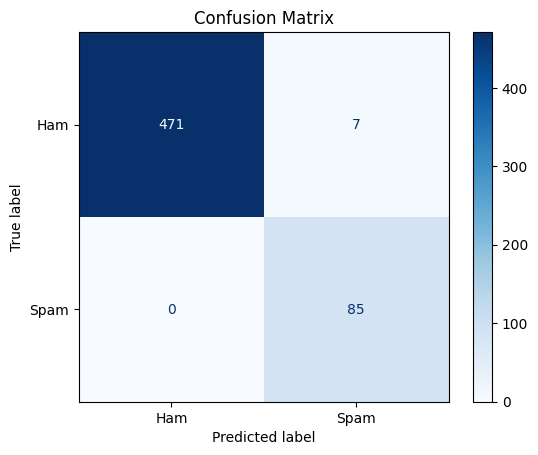

In [11]:
# Step 8: Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()